# ML Data


In [3]:
# Imports
import geopandas as gpd
import numpy as np
import pandas as pd
import os 
import requests
import json
import datetime
import time
import random

# Data Pull

### Census

In [2]:
k = "5e27dc113ca0300dabe2cbb8018489d6fcaf59fa"
URL = f"https://api.census.gov/data/2017/ecnlocmfg?get=NAME,NAICS2017_LABEL,ESTAB&for=county:011&in=state:49&NAICS2017&key={k}"
response = requests.get(URL)
response.json()

### Tract Centers - Geopandas
I may want to add sensors nearby and weights

In [27]:
geojson_gdf = gpd.read_file('../static/data/converted_geojson_data.geojson')

geojson_gdf['centroid'] = geojson_gdf.geometry.centroid

/var/folders/kn/v0dr_8xn1qj15xgwlhdyfzph0000gn/T/ipykernel_41735/2113192064.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geojson_gdf['centroid'] = geojson_gdf.geometry.centroid


In [28]:
geojson_gdf.columns

Index(['OBJECTID', 'GEOID', 'Source', 'geoname', 'Stusab', 'Countyname',
       'State', 'County', 'Tract', 'BLKGRP', 'Low', 'Lowmod', 'Lmmi',
       'Lowmoduniv', 'Lowmod_pct', 'uclowmod', 'ucLowmod_p', 'MOE_LOWMOD_PCT',
       'MOE_UCLOWMOD_PCT', 'Shape__Area', 'Shape__Length', 'geometry',
       'centroid'],
      dtype='object')

In [29]:
geojson_gdf = geojson_gdf[['OBJECTID', 'GEOID','Countyname','Tract','Low','Lowmod','Lowmod_pct','centroid']]


In [169]:
geojson_gdf.head()

,OBJECTID,GEOID,Countyname,Tract,Low,Lowmod,Lowmod_pct,centroid,latitude,longitude
0,199060,490111251021,Davis County,125102,120,340,0.1833,POINT (-111.88081 41.08032),41.080325,-111.880810
1,199061,490111251022,Davis County,125102,245,490,0.1892,POINT (-111.88004 41.04248),41.042484,-111.880037
2,199062,490111251031,Davis County,125103,370,850,0.3131,POINT (-111.95631 41.13919),41.139194,-111.956309
3,199063,490111251032,Davis County,125103,430,1000,0.4264,POINT (-111.94339 41.11548),41.115477,-111.943393
4,199064,490111251041,Davis County,125104,165,475,0.1967,POINT (-111.91575 41.12877),41.128774,-111.915753


In [31]:
geojson_gdf.to_file('../static/data/centroids_data.geojson', driver='GeoJSON')

In [ ]:
geojson_gdf['latitude'] = geojson_gdf['centroid'].apply(lambda geom: geom.y)
geojson_gdf['longitude'] = geojson_gdf['centroid'].apply(lambda geom: geom.x)

## Salt Lake County City Assets
Matched with tract centers
https://gis-slcgov.opendata.arcgis.com/


#### Traffic Lights

In [201]:
geojson_gdf = gpd.read_file('../static/data/converted_geojson_data.geojson')


url_intersection = 'Signalized_Intersection.geojson'
geojson_int = gpd.read_file(f'../static/data/ml/{url_intersection}')


In [246]:
print(geojson_int['geometry'].values[0])

POLYGON ((-112.02506363201503 40.77663001321401, -112.02510763081013 40.7766261190684, -112.02515043516748 40.776615217447876, -112.02519093647675 40.776597590698685, -112.02522808577527 40.776573695344375, -112.02526092091576 40.77654415026206, -112.02528859148529 40.77650972065387, -112.02531038083067 40.77647129822856, -112.0253257246193 40.776429878106754, -112.02533422545508 40.77638653304787, -112.02533566317088 40.776342385666155, -112.02533000053059 40.776298579355604, -112.0253173841936 40.77625624867665, -112.02529814091645 40.77621648997165, -112.02527276908988 40.77618033297018, -112.02524192583088 40.77614871411957, -112.02520640996367 40.77612245233146, -112.02516714133054 40.776102227772355, -112.02512513696846 40.77608856424772, -112.02508148476835 40.77608181563566, -112.02503731529926 40.776082156721685, -112.02499377252725 40.77608957867185, -112.02495198418723 40.77610388926154, -112.02491303257526 40.776124717853996, -112.02487792651762 40.77615152499963, -112.0248

In [215]:
if geojson_gdf.crs != geojson_int.crs:
    geojson_int = geojson_int.to_crs(geojson_gdf.crs)

# Step 2: Perform the spatial join
joined_geodata = gpd.sjoin(geojson_int, geojson_gdf, how="inner", op="within")

/Users/juliakauffmann/miniforge3/envs/capstonev/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


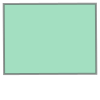

In [242]:
(joined_geodata['geometry'].values[130])

## Open-Mateo
https://open-meteo.com/en/docs/

In [3]:
# Must install the following

#!pip install openmeteo-requests
#!pip install requests-cache retry-requests numpy pandas

In [121]:
# Get Sensor lat and lon for Weather readings
dfx = pd.read_csv("../static/data/slc_daily_pm2.5_pm10_2016to2024.csv")
dfx = dfx.sort_values(['date'], ascending = False)

In [122]:
dfx=dfx.groupby(['sensor_id','latitude','longitude']).count().reset_index()[['latitude','longitude']]
dfx

,latitude,longitude
0,40.750816,-111.825290
1,41.224422,-111.968376
2,40.783870,-111.870140
3,40.595387,-111.807755
4,40.727630,-111.824425
...,...,...
217,40.593708,-111.895250
218,40.664610,-111.829270
219,40.567074,-111.988560
220,41.210533,-111.932014


In [155]:
wind_df = pd.DataFrame({})

In [156]:
#I really only needed wind for the actual sensor location for historic

# I want to modify this to just get. specific latitudes and longitudes instead of my grid method

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
start_date = datetime.datetime.strptime("2022-10-14", '%Y-%m-%d')
end_date = start_date + datetime.timedelta(days=10)

final_date = datetime.datetime.strptime("2024-03-10", '%Y-%m-%d')

i=0

while start_date < final_date:
    print(start_date)
    for i in range(0,222,37):

        url = "https://archive-api.open-meteo.com/v1/archive"

        params = {
            "latitude": list(dfx.iloc[i:i+36].latitude),
            "longitude": list(dfx.iloc[i:i+36].longitude),
            "start_date": datetime.datetime.strftime(start_date, '%Y-%m-%d'),
            "end_date": datetime.datetime.strftime(end_date, '%Y-%m-%d'),
            "daily": ["wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant",\
                     'weather_code','temperature_2m_max','temperature_2m_min',\
                     'rain_sum','snowfall_sum','precipitation_hours'],
            "temperature_unit": "fahrenheit",
            "wind_speed_unit": "mph",
            "timezone": "America/Denver"
        }
        responses = requests.get(url, params=params)
        print(responses.status_code)

        temp_df_b = pd.DataFrame()
        for response in responses.json():
    
            temp_df = pd.DataFrame(response['daily'])
            temp_df['latitiude'] = response['latitude']
            temp_df['longitude'] = response['longitude']
            temp_df['elevation'] = response['elevation']
            temp_df.drop_duplicates(subset=['wind_speed_10m_max',\
                                            'wind_gusts_10m_max',\
                                            'wind_direction_10m_dominant',\
                                            'weather_code','temperature_2m_max','temperature_2m_min',\
                                            'rain_sum','snowfall_sum','precipitation_hours',\
                                            'time'], keep='first',inplace = True)

            temp_df_b = pd.concat([temp_df_b,temp_df],ignore_index=True)

        wind_df = pd.concat([wind_df,temp_df_b],ignore_index=True)
        time.sleep(8+random.random())
    
    time.sleep(25.9+random.random())
    start_date += datetime.timedelta(days=11)
    end_date = start_date + datetime.timedelta(days=10)
    

2022-10-14 00:00:00
200
200
200
200
200
200
2022-10-25 00:00:00
200
200
200
200
200
200
2022-11-05 00:00:00
200
200
200
200
200
200
2022-11-16 00:00:00
200
200
200
200
200
200
2022-11-27 00:00:00
200
200
200
200
200
200
2022-12-08 00:00:00
200
200
200
200
200
200
2022-12-19 00:00:00
200
200
200
200
200
200
2022-12-30 00:00:00
200
200
200
200
200
200
2023-01-10 00:00:00
200
200
200
200
200
200
2023-01-21 00:00:00
200
200
200
200
200
200
2023-02-01 00:00:00
200
200
200
200
200
200
2023-02-12 00:00:00
200
200
200
200
200
200
2023-02-23 00:00:00
200
200
200
200
200
200
2023-03-06 00:00:00
200
200
200
200
200
200
2023-03-17 00:00:00
200
200
200
200
200
200
2023-03-28 00:00:00
200
200
200
200
200
200
2023-04-08 00:00:00
200
200
200
200
200
200
2023-04-19 00:00:00
200
200
200
200
200
200
2023-04-30 00:00:00
200
200
200
200
200
200
2023-05-11 00:00:00
200
200
200
200
200
200
2023-05-22 00:00:00
200
200
200
200
200
200
2023-06-02 00:00:00
200
200
200
200
200
200
2023-06-13 00:00:00
200
200
200


In [164]:
#df_wind_2021_2023 = pd.concat([wind_df_A_2020,wind_df_B_2021,wind_df_C_2021,wind_df_E_2022])

In [165]:
df_wind_2021_2023.head()

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,weather_code,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,precipitation_hours,latitiude,longitude,elevation
0,2021-01-01,4.1,12.3,85,3,29.4,12.5,0.0,0.00,0.0,40.738136,-111.82979,1470.0
1,2021-01-02,6.4,14.8,121,71,35.0,13.3,0.0,0.07,1.0,40.738136,-111.82979,1470.0
2,2021-01-03,9.9,21.7,148,73,35.5,20.5,0.0,1.89,8.0,40.738136,-111.82979,1470.0
3,2021-01-04,6.5,22.4,139,3,41.9,24.0,0.0,0.00,0.0,40.738136,-111.82979,1470.0
4,2021-01-05,7.1,21.7,76,73,40.2,19.7,0.6,1.75,9.0,40.738136,-111.82979,1470.0


In [166]:
#wind_df.drop_duplicates(inplace=True)
print(f'length before drop: {len(df_wind_2021_2023)}')
df_wind_2021_2023.drop_duplicates(keep='first',inplace = True)
print(f'length before drop: {len(df_wind_2021_2023)}')

length before drop: 292248
length before drop: 227760


In [167]:
df_wind_2021_2023.rename(columns={'latitiude':'latitude'}, inplace=True)
df_wind_2021_2023.sort_values(['time','latitude','longitude'],inplace=True)

In [172]:
df_wind_2021_2023='' #clear
wind_df_A_2020 = ''
wind_df_B_2021 = ''
wind_df_C_2021 =''
wind_df_E_2022 = ''

#df_wind_2021_2023.to_csv('../static/data/df_wind_2021_2023.csv')

## Purple Air Data
if I'm using alititude

In [ ]:
dfx = pd.read_csv("../static/data/slc_daily_pm2.5_pm10_2016to2024.csv")
dfx = df.sort_values(['date'], ascending = False)


In [ ]:
df_sensors = df[['sensor_id','latitude','longitude','date','altitude','pm2.5_atm','pm10.0_atm']]
df_sensors.rename(columns = {'pm2.5_atm':'pm2','pm10.0_atm':'pm10'},inplace=True)
df_sensors['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

# Model - Tensorflow

In [251]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

ModuleNotFoundError: No module named 'sklearn'

In [257]:
# set randomizer seeds

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
import matplotlib.pyplot as plt

In [280]:
import numpy as np

# Parameters for the distribution
mean = 3.2  # mean
std_dev = 1.2  # standard deviation
num_samples = 1000  # number of samples

# Generate random samples from a normal distribution
samples = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# samples now contains 1000 random numbers drawn from a normal distribution with mean 0 and standard deviation 1


(array([  6.,  28.,  68., 150., 232., 247., 179.,  64.,  20.,   6.]),
 array([-0.61204458,  0.14270911,  0.89746279,  1.65221647,  2.40697015,
         3.16172383,  3.91647751,  4.6712312 ,  5.42598488,  6.18073856,
         6.93549224]),
 <BarContainer object of 10 artists>)

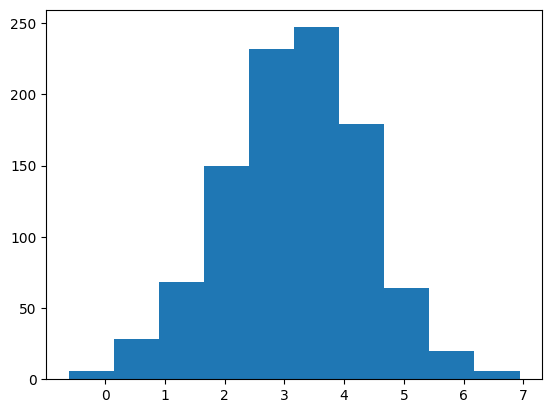

In [281]:
plt.hist(samples)

In [ ]:
def dnn_model_run(results_2_df,seed):   
    df_combined,single_feature_names=align_timeseries(pd.read_csv('../data/processed/data_augmented.csv'),df_features)
    
    # Parameters
    results = []
    epochs = 20
    batch_size = 40
    lr = .02
    folds = 5
    denses = [64, 64, 32]
    drops = [.6, .6]
    histories = []
    epsilon = 1e-7

    def create_model2(d1, d2, d3, do1, do2):
        act_features = tf.keras.layers.Input(shape=(len(single_feature_names),), name='act_features')
        dense1 = tf.keras.layers.Dense(units=d1, activation='relu', name='hidden1')(act_features)
        dropout2 = tf.keras.layers.Dropout(do1)(dense1)
        dense2 = tf.keras.layers.Dense(units=d2, activation='relu', name='hidden2')(dropout2)
        dropout3 = tf.keras.layers.Dropout(do2)(dense2)
        dense3 = tf.keras.layers.Dense(units=d3, activation='relu', name='hidden3')(dropout3)
        logits = tf.keras.layers.Dense(units=3, activation='softmax', name='logits')(dense3)
        model2 = tf.keras.models.Model(inputs=[act_features], outputs=logits)
        return model2

    precision_metric = tf.keras.metrics.Precision(name='precision')
    recall_metric = tf.keras.metrics.Recall(name='recall')

    n_splits = folds
    kf = KFold(n_splits=folds, shuffle=True, random_state=42) # Added random seed for reproducibility

    labels = np.array(df_combined.madrs2_grouped)
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    y_data = tf.keras.utils.to_categorical(encoded_labels, num_classes=num_classes)

    history = []

    for train_index, test_index in kf.split(df_combined[single_feature_names]):
        x_train = {'act_features': df_combined[single_feature_names].iloc[train_index]}
        y_train = y_data[train_index]
        x_test = {'act_features': df_combined[single_feature_names].iloc[test_index]}
        y_test = y_data[test_index]

        scaler = StandardScaler()
        scaler.fit(x_train['act_features'].values)
        x_train['act_features'] = scaler.transform(x_train['act_features'].values)
        x_test['act_features'] = scaler.transform(x_test['act_features'].values)

        model2 = create_model2(denses[0], denses[1], denses[2], drops[0], drops[1])
        model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                       loss='categorical_crossentropy',
                       metrics=['accuracy', precision_metric, recall_metric])

        history.append(model2.fit(
            x=[x_train['act_features']],
            y=y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_test['act_features'], y_test),
            verbose=1
        ))

    accuracy_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    for h in history:
        accuracy_per_fold.append(h.history['val_accuracy'][-1])
        precision = h.history['val_precision'][-1]
        recall = h.history['val_recall'][-1]
        f1 = 2 * (precision * recall) / (precision + recall + epsilon)
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)

    average_accuracy = sum(accuracy_per_fold) / len(accuracy_per_fold)
    average_precision = sum(precision_per_fold) / len(precision_per_fold)
    average_recall = sum(recall_per_fold) / len(recall_per_fold)
    average_f1 = sum(f1_per_fold) / len(f1_per_fold)
    results.append((average_accuracy, average_precision, average_recall, average_f1))

    print('Average validation accuracy:', average_accuracy)
    print('Average validation precision:', average_precision)
    print('Average validation recall:', average_recall)
    print('Average validation F1 score:', average_f1)

    # Create a DataFrame with the metrics and parameters
    new_result = {
        'Accuracy': average_accuracy,
        'Precision': average_precision,
        'Recall': average_recall,
        'F1': average_f1,
        'Epochs': epochs,
        'Batch Size': batch_size,
        'Learning Rate': lr,
        'Folds': folds,
        'Denses': str(denses), # You might want to convert the list to a string or another format
        'Drops': str(drops)    # Same here
    }

    # Add the new result as a new row
    results_2_df.loc[len(results_2_df)] = new_result
    
    return results_2_df

results_2_df=dnn_model_run(results_2_df,seed)

In [268]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input shape. For example, using 10 features.
input_shape = (1,)

# Define the input layer. This specifies the shape of your data.
inputs = Input(shape=input_shape)

# Define a dense layer with, for example, 64 units and ReLU activation.
# Note that we're directly using the inputs to define the flow of data.
dense_layer = Dense(64, activation='relu')(inputs)

# Create the model. Specify the inputs and output in the Model function.
model = Model(inputs=inputs, outputs=dense_layer)

# Compile the model. Choose an optimizer, loss function, and metrics to monitor.
model.compile(optimizer='adam',
              loss='mean_squared_error',  # For regression tasks. Use 'categorical_crossentropy' for classification.
              metrics=['accuracy'])  # Adjust metrics based on the problem type.

# Print the model summary to see the model's architecture
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128 (512.00 B)

 Trainable params: 128 (512.00 B)

 Non-trainable params: 0 (0.00 B)

In [267]:
samples

array([2.97118112, 3.46091945, 4.24408128, 3.79481827, 3.38050269,
       3.6379532 , 6.0840987 , 3.13085744, 3.44131886, 4.46078528,
       4.52663112, 4.62443637, 3.96647627, 1.8283941 , 5.16011784,
       1.82438553, 3.56316256, 2.29486898, 3.12303398, 3.59451489,
       3.58562866, 3.70630491, 5.13645352, 3.74424116, 2.90701204,
       4.3569046 , 4.62736459, 1.72687062, 3.91688008, 4.04140729,
       2.8429238 , 4.85084818, 3.0199333 , 3.35069174, 2.99231381,
       3.21869486, 1.8844699 , 1.47193894, 5.11340608, 2.18364638,
       2.01032918, 0.61593186, 2.4332459 , 1.61229225, 5.17041819,
       4.41178051, 2.37421959, 5.90292297, 4.37811858, 2.81020234,
       0.20071314, 5.94913109, 1.53251304, 1.2255215 , 4.42708452,
       6.12770289, 4.86112738, 3.87669094, 3.91370521, 4.22409867,
       4.11071431, 3.53742971, 3.32504132, 3.12488825, 2.29524249,
       2.86318991, 1.16845182, 3.08199245, 2.01369067, 1.87569282,
       3.41587298, 4.87040274, 4.30197993, 1.31539928, 2.01244

In [290]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Generating random data: 1000 samples from a normal distribution
num_samples = 1000
data = np.random.normal(loc=4.0, scale=1.0, size=num_samples)
data
# Since we're "predicting" the mean, our "target" is just the mean of the distribution
# In a real linear regression problem, this would be your dependent variable.
target = np.mean(data) * np.ones((num_samples,))

# Creating a simple model with a single dense layer
inputs = Input(shape=(1,))
outputs = Dense(1, use_bias=True)(inputs)  # `use_bias=True` adds a bias term, completing our linear equation
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')



# Reshaping data for the model
X = data.reshape(-1, 1)
Y = target.reshape(-1, 1)

# Training the model
# Training the model for more epochs might help
model.fit(X, Y, epochs=100, batch_size=32)  # Increased epochs

# The model's weights (coefficients)
weights = model.layers[1].get_weights()[0]
bias = model.layers[1].get_weights()[1]

print(f"Weights: {weights.flatten()}, Bias: {bias}")


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 7.7598
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.6475
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.6045
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.5643
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.5268
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.4917
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.4590
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.4285
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.4000
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.3734
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3486
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.3254
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.3037
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.2835
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 
Epoch 81/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.0028
Epoch 82/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.0026
Epoch 83/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.0025
Epoch 84/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.0023
Epoch 85/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.0021
Epoch 86/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.0020
Epoch 87/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.0019
Epoch 88/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.0017   
Epoch 89/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.0016   
Epoch 90/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.0015   
Epoch 91/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0014  
Epoch 92/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0013  
Epoch 93/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.0012  
Epoch 94/100
32/32 ━━━━━━━━━━━━━━

In [291]:
target

array([3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313239,
       3.96313239, 3.96313239, 3.96313239, 3.96313239, 3.96313

In [293]:
np.ones(num_samples,)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.